## Adavanced Machine Learning
### Lab Task: 9
#### Amir Ali

### ----------------------------------------------------------------------------------------------------------------------------

### Import libraries

In [88]:
import random
import numpy as np
from sklearn.utils import resample
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from matplotlib import pyplot as plt

### Dataset

In [52]:
# Original data
data = load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [49]:
# Artificial dataset

from scipy.stats import chi2


n = 12000
k = 10
train_size = 2000

X2 = np.random.normal(size = (n, k))
median = chi2.ppf(q = 0.5, df = 10, loc = 0, scale = 1)
y2 = np.array([1 if i > median else -1 for i in (X2**2).sum(axis = 1)])


X_train1, X_test1 = X2[:train_size,:], X2[train_size:,:]
y_train1, y_test1 = y2[:train_size], y2[train_size:]

## Task 1: Bagging vs Boosting

### Bagging Algorithm

In [50]:
def bagging_algorithm(Xtrain, Xtest, Ytrain, Ytest, n=10):
    preds = []
    for _ in range(n):
        data_c = np.column_stack((X_train,y_train))
        boot = resample(data_c, replace=True)
        l = len(boot[0]) - 1
        clf = DT(max_depth=5).fit(boot[:,0:(l)], boot[:,l])
        preds.append(clf.predict(X_test))
        
    voting_pred = np.median(preds, axis = 0)
    score = np.sum(voting_pred == y_test)/len(y_test)
    return score

#### Perform on Original Data

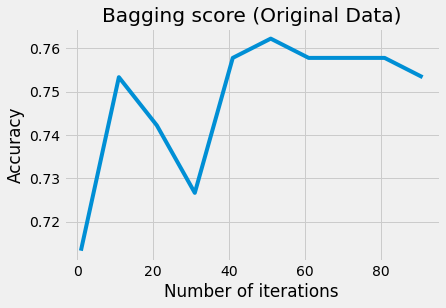

In [61]:
s = np.arange(1, 100, 10)
score = []
for n in s:
    score.append(bagging_algorithm(X_train, X_test, y_train, y_test, n=n))

plt.style.use("fivethirtyeight")
plt.plot(ns, score)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Bagging score (Original Data)')
plt.show()

#### Perform on Artificial Data

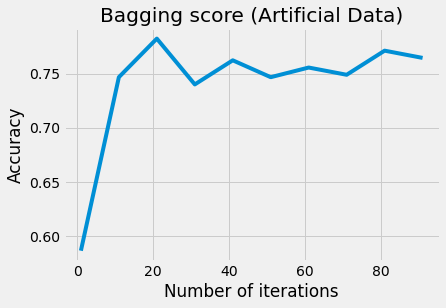

In [60]:
s = np.arange(1, 100, 10)
score = []
for n in s:
    score.append(bagging_algorithm(X_train1, X_test1, y_train1, y_test1, n=n))

plt.style.use("fivethirtyeight")
plt.plot(ns, score)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Bagging score (Artificial Data)')
plt.show()

### Boosting Algorithm

In [73]:
def boosting_algorithm(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, n=5):
    random.seed(10)
    data = pd.DataFrame(np.column_stack((X_train,y_train)))
    preds = []
    betas = []
    # Sample weights initialization
    data['weights'] = 1/data.shape[0]
    for _ in range(n):
        # Sampling
        data_sample = data.sample(len(data), replace = True, weights = data['weights'])
        # Fitting and prediction
        clf = DT(random_state=100, max_depth=5)
        l = data_sample.shape[1] - 2
        clf.fit(data_sample.iloc[:,0:l], data_sample.iloc[:,l])
        pred = clf.predict(data.iloc[:,0:l])
        # Error
        e = sum((pred != data.iloc[:,l])*data['weights'])
        beta = e/(1-e)
        betas.append(beta)
        # Correctly classified
        cor_clf = data[pred ==  data.iloc[:,l]].index
        # Updating weights
        data.loc[cor_clf]['weights'] = data.loc[cor_clf]['weights']*beta
        data['weights'] = data['weights']/sum(data['weights'])
        # Predicting with f_i on test set
        pred = clf.predict(X_test)
        preds.append(pred)
        
    # Classification
    preds = np.array(preds).T.tolist()
    m = len(preds)
    betas = [betas]*m
    voting_pred = []
    for datum, weight in zip(preds, betas):
        voting_pred.append(weighted_median(datum, weight))

    score = np.sum(voting_pred == y_test)/len(y_test)
    return score   

#### Perform on Original Data

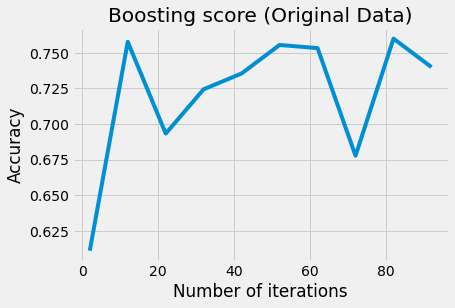

In [78]:
ns = np.arange(2, 100, 10)
score = []
for n in ns:
    score.append(boosting_algorithm(X_train, X_test, y_train, y_test, n=n))

plt.plot(ns, score)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Boosting score (Original Data)')
plt.show()

#### Perform on Artificial Data

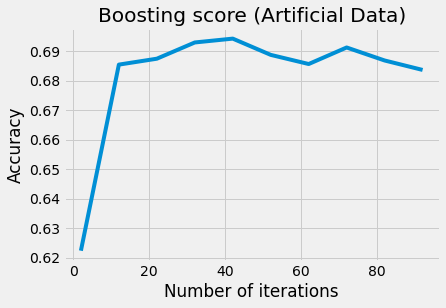

In [75]:
ns = np.arange(2, 100, 10)
score = []
for n in ns:
    score.append(boosting_algorithm(X_train1, X_test1, y_train1, y_test1, n=n))

plt.plot(ns, score)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Boosting score (Artificial Data)')
plt.show()

## Task 2: Compare the following ensemble methods

• Bagging
• Boosting (AdaBoost)
• Random Forest
• Single tree (without pruning)
• Decision stump (tree of depth 1)
• Gradient Boosting

### Bagging

In [85]:
Bagging = bagging_algorithm(X_train1, X_test1, y_train1, y_test1, n=1000)
print(f'Bagging: {Bagging}')

Bagging: 0.7688888888888888


### Boosting

In [83]:
Boosting = boosting_algorithm(X_train1, X_test1, y_train1, y_test1, n=1000)
print(f'Boosting: {Boosting }')

boosting 1000 iterations: 0.6933


### Random Forrest

In [86]:
Random_Forrest = RF(max_depth=5, random_state=0, n_estimators=1000)
Random_Forrest.fit(X_train, y_train)
RandomForrest = Random_Forrest.score(X_test, y_test)
print(f'Random Forrest: {RandomForrest}')

Random Forrest: 0.94


### Single Tree (without pruning)

In [87]:
Single_Tree = DT(random_state=0)
Single_Tree.fit(X_train, y_train)
SingleTree = Single_Tree.score(X_test, y_test)
print(f'Single tree: {SingleTree}')

Single tree: 0.8377777777777777


### Decision Stump (tree of depth 1)

In [90]:
Decision_Stump = DT(max_depth=1, random_state=0)
Decision_Stump.fit(X_train, y_train)
DecisionStump = Decision_Stump.score(X_test, y_test)
print(f'Decision Stump: {DecisionStump}')

Decision Stump: 0.19111111111111112


### Gradient Boosting

In [91]:
Gradient_Boosting = GBC(max_depth=5, random_state=0, n_estimators=1000)
Gradient_Boosting.fit(X_train, y_train)
GradientBoosting = Gradient_Boosting.score(X_test, y_test)
print(f'GradientBoosting: {GradientBoosting}')

GradientBoosting: 0.9711111111111111


## Visualization (ensemble methods)

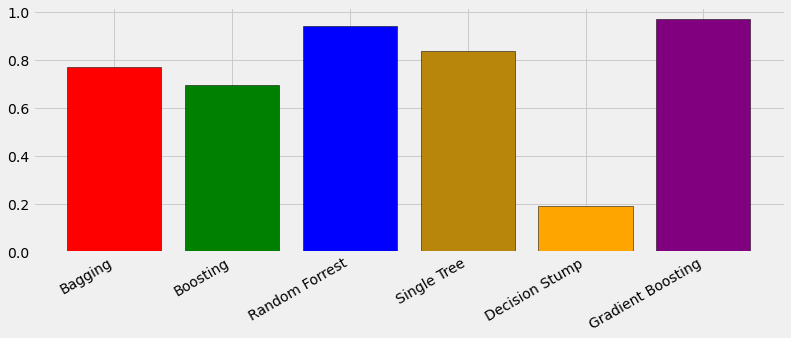

In [97]:
plt.figure(figsize = (12, 5))

result = [Bagging, Boosting, RandomForrest, SingleTree, DecisionStump, GradientBoosting]
label = ["Bagging", "Boosting", "Random Forrest", "Single Tree", "Decision Stump", "Gradient Boosting"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple']

plt.bar(label, result, color = colors, edgecolor='black')
plt.gcf().autofmt_xdate()